## Week1 授業前課題１ Pythonを使ってみよう

### 【問題1】べき乗の算術演算子を使用して作成
べき乗の算術演算子を使用したプログラムを作ってください。  
雛形として紙を1回折った時の厚さを計算するコードを用意しました。  
これを43回折った時のコードに書き換えてください。

In [1]:
THICKNESS = 0.00008
folded_thickness = THICKNESS*2**43
print("厚さ： {}メートル".format(folded_thickness))

### 【問題2】単位の変換
単位がメートルだと実感が湧きづらいので、◯◯万キロメートル に変換して表示させてください。

In [2]:
print("厚さ： {:.2f}万キロメートル".format(folded_thickness/10000000))

厚さ： 70.37万キロメートル


### 【問題3】for文を使用して作成
次に、for文を使用したプログラムを作ってください。  
べき乗の算術演算子は使ってはいけません。算術演算子は四則演算（+、-、*、/）のみ使えます。

In [3]:
folded_thickness2 = THICKNESS
for _ in range(43):
    folded_thickness2 = folded_thickness2 * 2
print('厚さ: {:.2f}万キロメートル'.format(folded_thickness2/10000000))

厚さ: 70.37万キロメートル


### 【問題4】計算時間の比較
2つの方法はどちらが正しいわけでもありませんが、コードの良さを評価する際には以下のような着目点があります。  
- 計算速度
- メモリの使用量
- 可読性
- 拡張性
- 再利用性
今回は計算速度を比較してみます。  
以下の雛形を使用して、2つの方法の計算時間を出力してください。  
そして、それぞれの計算時間の関係を簡単に説明してください。  
どちらの書き方が良さそうでしょうか。  
なお、変数の定義やprint文など、どちらの方法でも使われている部分は除いた範囲の時間を比較してください。

In [4]:
%precision 3

'%.3f'

In [5]:
import time
start = time.time()
folded_thickness = THICKNESS*2**1000
elapsed_time = time.time() - start
print('time : {}[s]'.format(elapsed_time))

time : 0.0001270771026611328[s]


In [6]:
start = time.time()
folded_thickness3 = THICKNESS
for _ in range(1000):
    folded_thickness3 = folded_thickness3 * 2
elapsed_time = time.time() - start
print('time : {}[s]'.format(elapsed_time))

time : 0.0001652240753173828[s]


`べき乗演算より、for文の方が時間がかかる`

In [7]:
%%timeit
folded_thickness = THICKNESS*2**43

57.8 ns ± 0.356 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [8]:
%%timeit
folded_thickness4 = THICKNESS
for _ in range(43):
    folded_thickness4 *= 2

2.04 µs ± 122 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### 【問題5】リストへの保存
ここまでは43回折った後の最後の値だけを使用していましたが、グラフで可視化するためには過程の値も必要です。  
for文を使用したコードに、過程の値合計44個を記録するコードを加えてください。

In [9]:
folded_thickness = THICKNESS
past_thickness = [folded_thickness]
for _ in range(43):
    folded_thickness *= 2
    past_thickness.append(folded_thickness)

In [10]:
len(past_thickness)

44

### 【問題6】折れ線グラフの表示
グラフの描画には Matplotlib という ライブラリ を用います。  
リストへ記録するコードの後ろで以下の雛形を使用してください。

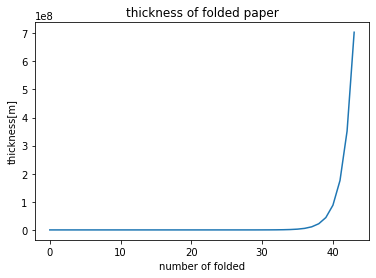

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('thickness of folded paper')
plt.xlabel('number of folded')
plt.ylabel('thickness[m]')
plt.plot(past_thickness)
plt.show();

`厚さが指数関数的に急激に増加している`

### 【問題7】グラフのカスタマイズ
グラフをより見やすくカスタマイズしてみましょう。  
カスタマイズしたグラフを最低3種類作成してください。  
例えば以下のように書き換えることで、線の色を赤に変更できます。

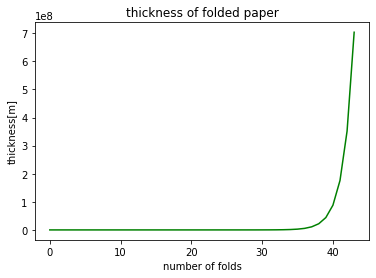

In [12]:
"""
カスタマイズ１
"""
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(past_thickness, color='green')
plt.show()

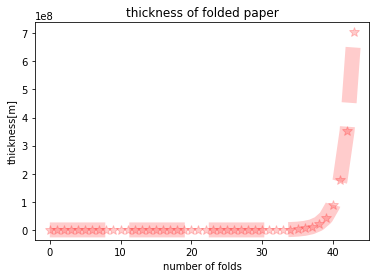

In [13]:
"""
カスタマイズ２
"""
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(past_thickness, marker='*',markersize=10, linestyle='--', color='red', linewidth=15, alpha=0.2)
plt.show()

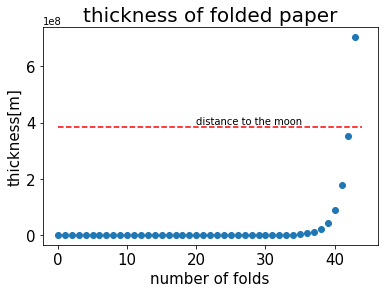

In [14]:
"""
カスタマイズ３
"""
plt.title("thickness of folded paper", fontsize=20)
plt.xlabel("number of folds", fontsize=15)
plt.ylabel("thickness[m]", fontsize=15)
plt.tick_params(labelsize=15)
plt.plot(past_thickness, marker='o', linewidth=0)
plt.hlines([384400000], xmin=0, xmax=len(past_thickness), color='red', linestyle='--')
plt.text(20, 394400000, 'distance to the moon', fontsize=10)
plt.show()